In [1]:
import pandas as pd
import numpy as np
import fastai

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline


from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics


# load data

In [3]:
app_train = pd.read_csv('./data/application_train.csv', low_memory= False)

In [55]:
app_train.shape

(307511, 122)

In [23]:
pd.options.display.max_rows = 100

In [24]:
app_train.head().T

,0,1,2,3,4
SK_ID_CURR,100002,100003,100004,100006,100007
TARGET,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M
FLAG_OWN_CAR,N,N,Y,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,202500,270000,67500,135000,121500
AMT_CREDIT,406598,1.2935e+06,135000,312682,513000
AMT_ANNUITY,24700.5,35698.5,6750,29686.5,21865.5


In [10]:
bureau = pd.read_csv('./data/bureau.csv', low_memory= False)

In [11]:
bureau.head().T

,0,1,2,3,4
SK_ID_CURR,215354,215354,215354,215354,215354
SK_ID_BUREAU,5714462,5714463,5714464,5714465,5714466
CREDIT_ACTIVE,Closed,Active,Active,Active,Active
CREDIT_CURRENCY,currency 1,currency 1,currency 1,currency 1,currency 1
DAYS_CREDIT,-497,-208,-203,-203,-629
CREDIT_DAY_OVERDUE,0,0,0,0,0
DAYS_CREDIT_ENDDATE,-153,1075,528,NaN,1197
DAYS_ENDDATE_FACT,-153,NaN,NaN,NaN,NaN
AMT_CREDIT_MAX_OVERDUE,NaN,NaN,NaN,NaN,77674.5
CNT_CREDIT_PROLONG,0,0,0,0,0


In [12]:
bureau_balance = pd.read_csv('./data/bureau_balance.csv', low_memory= False)
bureau_balance.head().T

,0,1,2,3,4
SK_ID_BUREAU,5715448,5715448,5715448,5715448,5715448
MONTHS_BALANCE,0,-1,-2,-3,-4
STATUS,C,C,C,C,C


In [14]:
pop_cash_balance = pd.read_csv('./data/POS_CASH_balance.csv', low_memory= False)
pop_cash_balance.head().T

,0,1,2,3,4
SK_ID_PREV,1803195,1715348,1784872,1903291,2341044
SK_ID_CURR,182943,367990,397406,269225,334279
MONTHS_BALANCE,-31,-33,-32,-35,-35
CNT_INSTALMENT,48,36,12,48,36
CNT_INSTALMENT_FUTURE,45,35,9,42,35
NAME_CONTRACT_STATUS,Active,Active,Active,Active,Active
SK_DPD,0,0,0,0,0
SK_DPD_DEF,0,0,0,0,0


In [15]:
credit_card_balance = pd.read_csv('./data/credit_card_balance.csv', low_memory= False)
credit_card_balance.head().T

,0,1,2,3,4
SK_ID_PREV,2562384,2582071,1740877,1389973,1891521
SK_ID_CURR,378907,363914,371185,337855,126868
MONTHS_BALANCE,-6,-1,-7,-4,-1
AMT_BALANCE,56.97,63975.6,31815.2,236572,453919
AMT_CREDIT_LIMIT_ACTUAL,135000,45000,450000,225000,450000
AMT_DRAWINGS_ATM_CURRENT,0,2250,0,2250,0
AMT_DRAWINGS_CURRENT,877.5,2250,0,2250,11547
AMT_DRAWINGS_OTHER_CURRENT,0,0,0,0,0
AMT_DRAWINGS_POS_CURRENT,877.5,0,0,0,11547
AMT_INST_MIN_REGULARITY,1700.33,2250,2250,11795.8,22924.9


In [16]:
previous_application = pd.read_csv('./data/previous_application.csv', low_memory= False)
previous_application.head().T

,0,1,2,3,4
SK_ID_PREV,2030495,2802425,2523466,2819243,1784265
SK_ID_CURR,271877,108129,122040,176158,202054
NAME_CONTRACT_TYPE,Consumer loans,Cash loans,Cash loans,Cash loans,Cash loans
AMT_ANNUITY,1730.43,25188.6,15060.7,47041.3,31924.4
AMT_APPLICATION,17145,607500,112500,450000,337500
AMT_CREDIT,17145,679671,136444,470790,404055
AMT_DOWN_PAYMENT,0,NaN,NaN,NaN,NaN
AMT_GOODS_PRICE,17145,607500,112500,450000,337500
WEEKDAY_APPR_PROCESS_START,SATURDAY,THURSDAY,TUESDAY,MONDAY,THURSDAY
HOUR_APPR_PROCESS_START,15,11,11,7,9


In [17]:
installments_payments = pd.read_csv('./data/installments_payments.csv', low_memory= False)
installments_payments.head().T

,0,1,2,3,4
SK_ID_PREV,1054186.00,1330831.000,2085231.0,2452527.00,2714724.000
SK_ID_CURR,161674.00,151639.000,193053.0,199697.00,167756.000
NUM_INSTALMENT_VERSION,1.00,0.000,2.0,1.00,1.000
NUM_INSTALMENT_NUMBER,6.00,34.000,1.0,3.00,2.000
DAYS_INSTALMENT,-1180.00,-2156.000,-63.0,-2418.00,-1383.000
DAYS_ENTRY_PAYMENT,-1187.00,-2156.000,-63.0,-2426.00,-1366.000
AMT_INSTALMENT,6948.36,1716.525,25425.0,24350.13,2165.040
AMT_PAYMENT,6948.36,1716.525,25425.0,24350.13,2160.585


# missing data

In [18]:
app_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
   

In [28]:
app_train.shape[0]

307511

In [29]:
def print_missing(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [30]:
print_missing(app_train)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [5]:
app_train[app_train['TARGET'] == 1].shape[0]/app_train.shape[0]

0.08072881945686496

# select subset and try

In [4]:
app_train = app_train[0:100000]

In [83]:
app_train_origin =  app_train

In [175]:
app_train.shape

(100000, 122)

In [85]:
app_train[app_train['TARGET'] ==1].shape

(4026, 122)

## convert categorycal to number

In [5]:
import numpy as np

In [6]:
train_cats(app_train)

In [7]:
#use proc df to preocessing data, handling missing data
df, y, nas = proc_df(app_train, 'TARGET')

In [8]:
#split to train and valid set
from sklearn.model_selection import train_test_split

In [25]:
x_train.shape

(80000, 182)

In [26]:
x_train.head().T

,70540,66940,85571,63340,22703
SK_ID_CURR,181834,177621,199295,173455,126416
NAME_CONTRACT_TYPE,1,1,1,1,1
CODE_GENDER,1,1,1,1,2
FLAG_OWN_CAR,1,1,1,1,2
FLAG_OWN_REALTY,2,1,1,2,1
CNT_CHILDREN,0,0,4,1,0
AMT_INCOME_TOTAL,108000,225000,180000,58500,405000
AMT_CREDIT,460858,687600,571446,113760,1.46761e+06
AMT_ANNUITY,17500.5,19836,18562.5,7533,54517.5
AMT_GOODS_PRICE,324000,450000,477000,90000,1.35e+06


In [27]:
x_train.dtypes

SK_ID_CURR                           int32
NAME_CONTRACT_TYPE                    int8
CODE_GENDER                           int8
FLAG_OWN_CAR                          int8
FLAG_OWN_REALTY                       int8
CNT_CHILDREN                          int8
AMT_INCOME_TOTAL                   float32
AMT_CREDIT                         float32
AMT_ANNUITY                        float32
AMT_GOODS_PRICE                    float32
NAME_TYPE_SUITE                       int8
NAME_INCOME_TYPE                      int8
NAME_EDUCATION_TYPE                   int8
NAME_FAMILY_STATUS                    int8
NAME_HOUSING_TYPE                     int8
REGION_POPULATION_RELATIVE         float16
DAYS_BIRTH                           int16
DAYS_EMPLOYED                        int32
DAYS_REGISTRATION                  float16
DAYS_ID_PUBLISH                      int16
OWN_CAR_AGE                        float16
FLAG_MOBIL                            int8
FLAG_EMP_PHONE                        int8
FLAG_WORK_P

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=22)

In [180]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(x_train), y_train), rmse(m.predict(x_test), y_test),
                m.score(x_train, y_train), m.score(x_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [ ]:
import time

In [13]:
time1 = []

for i in range(0,5):
    print(i)
    m = RandomForestRegressor(n_jobs=-1)
    start_time = time.time()
    m.fit(x_train, y_train)
    time1.append(time.time() - start_time)

0
1
2
3
4


In [28]:
time1

[28.769960403442383,
 31.124756574630737,
 29.544600009918213,
 28.279584646224976,
 28.48702597618103]

In [33]:
max_int

[127, 32767, 2147483647, 9223372036854775807]

In [34]:
max_float

[65500.0, 3.4028235e+38, 1.7976931348623157e+308]

In [15]:
def change_type(df):
    for n,c in df.items():
        max_int = [np.iinfo(np.int8).max, 
                   np.iinfo(np.int16).max, 
                   np.iinfo(np.int32).max, 
                   np.iinfo(np.int64).max]

        max_float = [np.finfo(np.float16).max, 
                     np.finfo(np.float32).max, 
                     np.finfo(np.float64).max]

        if str(c.dtypes)[0:3] == 'int' or str(c.dtypes)[0:5] == 'float':
            print('column name:' + n)
            print('original type:' + str(c.dtypes))
            max_value = max([max(c), abs(min(c))])
            print('max value: ' + str(max_value))
            nums = ['8', '16', '32', '64'] if str(c.dtypes)[0:3] == 'int' else ['16', '32', '64']
            dtype = 'int' if str(c.dtypes)[0:3] == 'int' else 'float'
            max_dtypes = max_int if str(c.dtypes)[0:3] == 'int' else max_float
            for idx, max_dtype in enumerate(max_dtypes):
                if max_value < max_dtype: 
                    set_type = dtype + nums[idx]
                    print('selected type: '+ set_type)
                    df[n] = df[n].astype(set_type)
                    break
        print('\n')
    return(df)

In [16]:
x_train_change_type = change_type(x_train)

column name:SK_ID_CURR
original type:int64
max value: 216087
selected type: int32


column name:NAME_CONTRACT_TYPE
original type:int8
max value: 2
selected type: int8


column name:CODE_GENDER
original type:int8
max value: 3
selected type: int8


column name:FLAG_OWN_CAR
original type:int8
max value: 2
selected type: int8


column name:FLAG_OWN_REALTY
original type:int8
max value: 2
selected type: int8


column name:CNT_CHILDREN
original type:int64
max value: 12
selected type: int8


/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy




column name:AMT_INCOME_TOTAL
original type:float64
max value: 117000000.0
selected type: float32


column name:AMT_CREDIT
original type:float64
max value: 4050000.0
selected type: float32


column name:AMT_ANNUITY
original type:float64
max value: 258025.5
selected type: float32


column name:AMT_GOODS_PRICE
original type:float64
max value: 4050000.0
selected type: float32


column name:NAME_TYPE_SUITE
original type:int8
max value: 7
selected type: int8


column name:NAME_INCOME_TYPE
original type:int8
max value: 8
selected type: int8


column name:NAME_EDUCATION_TYPE
original type:int8
max value: 5
selected type: int8


column name:NAME_FAMILY_STATUS
original type:int8
max value: 6
selected type: int8


column name:NAME_HOUSING_TYPE
original type:int8
max value: 6
selected type: int8


column name:REGION_POPULATION_RELATIVE
original type:float64
max value: 0.072508
selected type: float16


column name:DAYS_BIRTH
original type:int64
max value: 25195
selected type: int16


column name:

max value: 1
selected type: int8


column name:FLAG_DOCUMENT_8
original type:int64
max value: 1
selected type: int8


column name:FLAG_DOCUMENT_9
original type:int64
max value: 1
selected type: int8


column name:FLAG_DOCUMENT_10
original type:int64
max value: 1
selected type: int8


column name:FLAG_DOCUMENT_11
original type:int64
max value: 1
selected type: int8


column name:FLAG_DOCUMENT_12
original type:int64
max value: 1
selected type: int8


column name:FLAG_DOCUMENT_13
original type:int64
max value: 1
selected type: int8


column name:FLAG_DOCUMENT_14
original type:int64
max value: 1
selected type: int8


column name:FLAG_DOCUMENT_15
original type:int64
max value: 1
selected type: int8


column name:FLAG_DOCUMENT_16
original type:int64
max value: 1
selected type: int8


column name:FLAG_DOCUMENT_17
original type:int64
max value: 1
selected type: int8


column name:FLAG_DOCUMENT_18
original type:int64
max value: 1
selected type: int8


column name:FLAG_DOCUMENT_19
original type:

In [17]:
time2 = []

for i in range(0,5):
    print(i)
    m = RandomForestRegressor(n_jobs=-1)
    start_time = time.time()
    m.fit(x_train_change_type, y_train)
    time2.append(time.time() - start_time)

0
1
2
3
4


In [35]:
time2

[30.33449935913086,
 27.707955360412598,
 28.013190507888794,
 28.12117886543274,
 29.18678879737854]

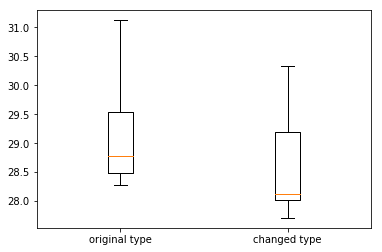

In [18]:
import matplotlib.pyplot as plt

data = [time1, time2]
plt.figure()
plt.boxplot(data, labels = ['original type', 'changed type'])

plt.show()